In [3]:
# Install necessary packages
!pip install tensorflow keras scikit-learn matplotlib seaborn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras import regularizers


data = pd.read_csv('/content/healthcare-dataset-stroke-data.csv')

# Display the first few rows
data.head()


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [12]:
data.dropna(inplace=True)  # Drop missing values
X = data.drop('stroke', axis=1)
y = data['stroke']

# Convert all columns to numeric if possible
X = X.apply(pd.to_numeric, errors='coerce')

# Drop any rows with NaN values resulting from conversion
X.dropna(inplace=True)

# One-hot encoding for categorical features
X = pd.get_dummies(X, drop_first=True)

# Convert boolean columns to integers (0 and 1)
for col in X.columns:
    if X[col].dtype == bool:
        X[col] = X[col].astype(int)

# Normalize features
X = (X - X.min()) / (X.max() - X.min())
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
# Define and train Standard Autoencoder
def build_standard_autoencoder(input_dim, encoding_dim):
    input_layer = Input(shape=(input_dim,))
    encoded = Dense(encoding_dim, activation='relu')(input_layer)
    decoded = Dense(input_dim, activation='sigmoid')(encoded)

    autoencoder = Model(input_layer, decoded)
    encoder = Model(input_layer, encoded)

    autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
    return autoencoder, encoder

autoencoder1, encoder1 = build_standard_autoencoder(X_train.shape[1], 8)
autoencoder1.fit(X_train, X_train, epochs=50, batch_size=256, shuffle=True, validation_split=0.2)

Epoch 1/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.7086 - val_loss: 0.7000
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6955 - val_loss: 0.6890
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6848 - val_loss: 0.6797
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6758 - val_loss: 0.6708
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6661 - val_loss: 0.6612
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6562 - val_loss: 0.6500
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6446 - val_loss: 0.6370
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6297 - val_loss: 0.6222
Epoch 9/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6154 - val_loss: 0.6056
Epoch 10/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5972 - val_loss: 0.5868
Epoch 11/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5756 - val_loss: 0.5661
Epoch 12/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5541 - val_l

In [29]:
encoded_train_1 = encoder1.predict(X_train)
encoded_test_1 = encoder1.predict(X_test)

128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [31]:
from tensorflow.keras.layers import Input, Dense, GaussianNoise # Import GaussianNoise

def build_denoising_autoencoder(input_dim, encoding_dim):
    input_layer = Input(shape=(input_dim,))
    noisy_input = GaussianNoise(0.1)(input_layer)
    encoded = Dense(encoding_dim, activation='relu')(noisy_input)
    decoded = Dense(input_dim, activation='sigmoid')(encoded)

    autoencoder = Model(input_layer, decoded)
    encoder = Model(input_layer, encoded)

    autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
    return autoencoder, encoder

autoencoder2, encoder2 = build_denoising_autoencoder(X_train.shape[1], 8)
autoencoder2.fit(X_train, X_train, epochs=50, batch_size=256, shuffle=True, validation_split=0.2)

Epoch 1/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.6988 - val_loss: 0.6879
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6851 - val_loss: 0.6750
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6718 - val_loss: 0.6611
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6566 - val_loss: 0.6451
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6393 - val_loss: 0.6268
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6205 - val_loss: 0.6070
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6007 - val_loss: 0.5864
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5804 - val_loss: 0.5660
Epoch 9/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5588 - val_loss: 0.5467
Epoch 10/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5390 - val_loss: 0.5289
Epoch 11/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5225 - val_loss: 0.5129
Epoch 12/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5077 - val_l

In [32]:
encoded_train_2 = encoder2.predict(X_train)
encoded_test_2 = encoder2.predict(X_test)

128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


In [38]:
# Define and train Variational Autoencoder
class VAELoss(tf.keras.losses.Loss):
    def call(self, y_true, y_pred): # Removed z_mean and z_log_var as arguments
        # Calculate z_mean and z_log_var from the model's output
        z_mean, z_log_var, _ = encoder3(y_true) # Access encoder3 to get z_mean and z_log_var

        xent_loss = input_dim * tf.keras.losses.binary_crossentropy(y_true, y_pred)
        kl_loss = -0.5 * tf.reduce_mean(1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var), axis=-1) # Modified KL loss calculation
        return tf.reduce_mean(xent_loss + kl_loss)

def build_variational_autoencoder(input_dim, encoding_dim):
    # Sampling function for VAE
    def sampling(args):
        z_mean, z_log_var = args
        batch = K.shape(z_mean)[0]
        dim = K.int_shape(z_mean)[1]
        epsilon = K.random_normal(shape=(batch, dim))
        return z_mean + K.exp(0.5 * z_log_var) * epsilon

    input_layer = Input(shape=(input_dim,))
    h = Dense(encoding_dim, activation='relu')(input_layer)
    z_mean = Dense(encoding_dim)(h)
    z_log_var = Dense(encoding_dim)(h)
    z = Lambda(sampling, output_shape=(encoding_dim,))([z_mean, z_log_var])
    encoder = Model(input_layer, [z_mean, z_log_var, z])

    # Decoder
    latent_inputs = Input(shape=(encoding_dim,))
    x = Dense(input_dim, activation='sigmoid')(latent_inputs)
    decoder = Model(latent_inputs, x)

    # VAE model
    outputs = decoder(encoder(input_layer)[2])
    vae = Model(input_layer, outputs)

    # Compile VAE model with custom loss
    vae.compile(optimizer='adam', loss=VAELoss()) # Removed arguments from VAELoss()

    return vae, encoder, decoder

vae, encoder3, decoder = build_variational_autoencoder(X_train.shape[1], 8)

# Pass z_mean and z_log_var to the loss function during training
vae.fit(X_train, X_train, epochs=50, batch_size=256, shuffle=True, validation_split=0.2) # Added z_mean and z_log_var to fit()

Epoch 1/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 16.6005 - val_loss: 16.2128
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 15.9993 - val_loss: 15.7008
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 15.6454 - val_loss: 15.4167
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 15.2062 - val_loss: 14.9414
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 14.7611 - val_loss: 14.5986
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 14.3862 - val_loss: 14.1507
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 13.9139 - val_loss: 13.6083
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 13.5835 - val_loss: 13.2316
Epoch 9/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 13.1191 - val_loss: 12.9278
Epoch 10/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 12.8595 - val_loss: 12.7330
Epoch 11/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 12.5091 - val_loss: 12.3227
Epoch 12/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 

In [39]:
# Get encoded features
encoded_train_3 = encoder3.predict(X_train)[2]  # Use the sampled output
encoded_test_3 = encoder3.predict(X_test)[2]

128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


In [40]:
# Combine encoded features
combined_train = np.hstack((encoded_train_1, encoded_train_2, encoded_train_3))
combined_test = np.hstack((encoded_test_1, encoded_test_2, encoded_test_3))

In [41]:
# Train and evaluate classifier
def evaluate_classifier(X_train, y_train, X_test, y_test):
    clf = RandomForestClassifier()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(classification_report(y_test, y_pred))
    return accuracy_score(y_test, y_pred)

print("Evaluating Standard Autoencoder Features:")
accuracy_1 = evaluate_classifier(encoded_train_1, y_train, encoded_test_1, y_test)

print("Evaluating Denoising Autoencoder Features:")
accuracy_2 = evaluate_classifier(encoded_train_2, y_train, encoded_test_2, y_test)

print("Evaluating Variational Autoencoder Features:")
accuracy_3 = evaluate_classifier(encoded_train_3, y_train, encoded_test_3, y_test)

print("Evaluating Combined Features:")
combined_accuracy = evaluate_classifier(combined_train, y_train, combined_test, y_test)


Evaluating Standard Autoencoder Features:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.33      0.02      0.03        62

    accuracy                           0.94      1022
   macro avg       0.64      0.51      0.50      1022
weighted avg       0.90      0.94      0.91      1022

Evaluating Denoising Autoencoder Features:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.40      0.03      0.06        62

    accuracy                           0.94      1022
   macro avg       0.67      0.51      0.51      1022
weighted avg       0.91      0.94      0.91      1022

Evaluating Variational Autoencoder Features:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022

Evaluating Combined Features:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


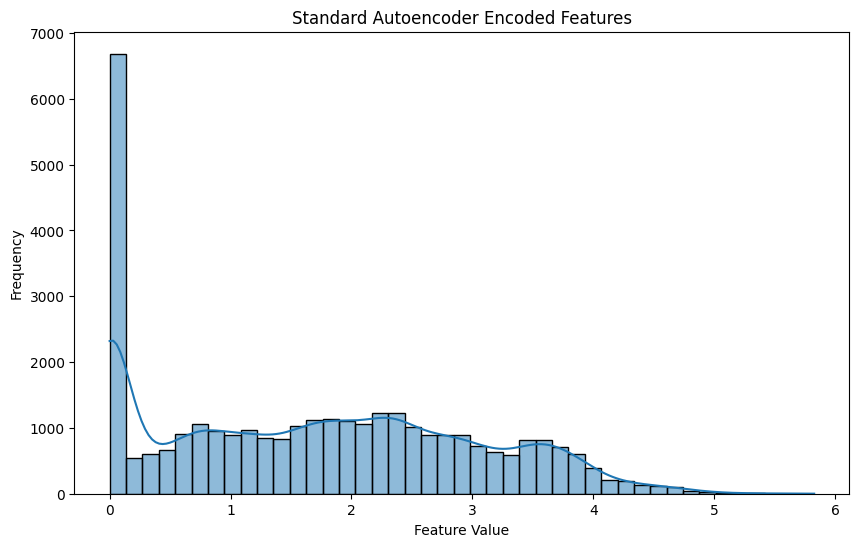

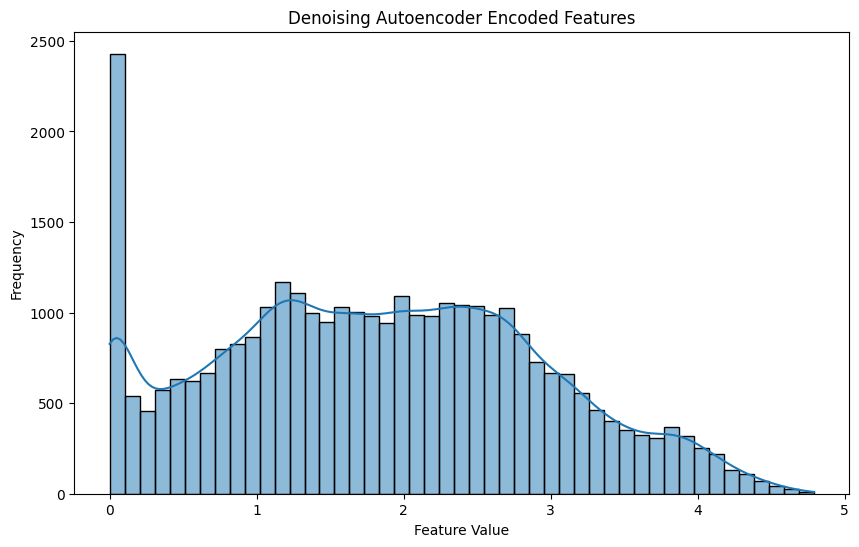

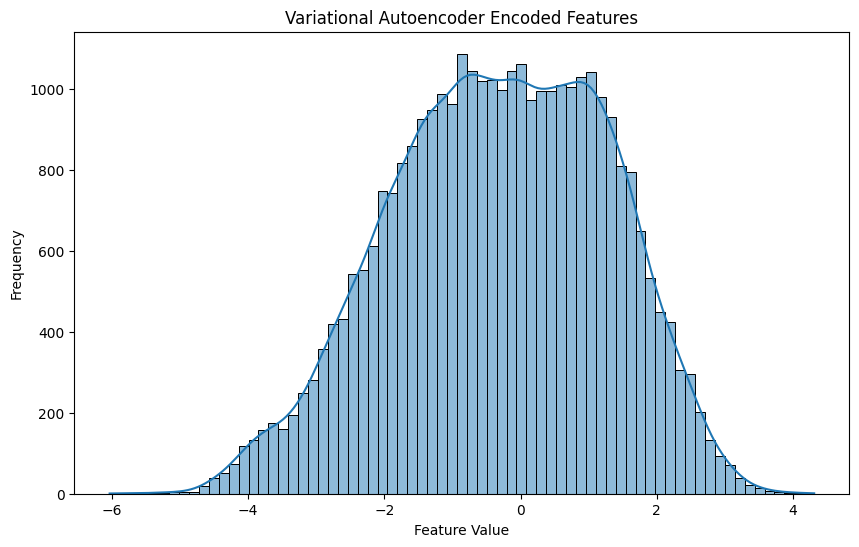

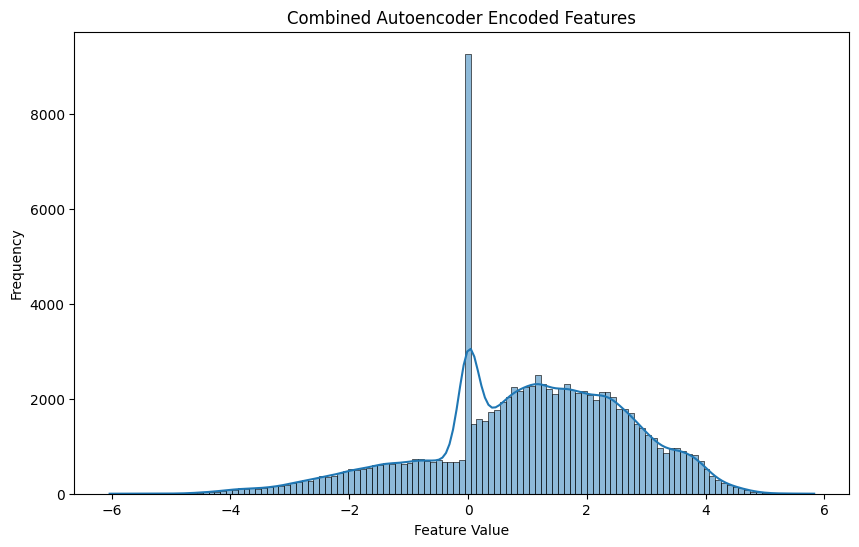

In [42]:
# Visualization
def plot_feature_distribution(data, title):
    plt.figure(figsize=(10, 6))
    sns.histplot(data, kde=True)
    plt.title(title)
    plt.xlabel('Feature Value')
    plt.ylabel('Frequency')
    plt.show()

# Plot histograms for encoded features
plot_feature_distribution(encoded_train_1.flatten(), 'Standard Autoencoder Encoded Features')
plot_feature_distribution(encoded_train_2.flatten(), 'Denoising Autoencoder Encoded Features')
plot_feature_distribution(encoded_train_3.flatten(), 'Variational Autoencoder Encoded Features')
plot_feature_distribution(combined_train.flatten(), 'Combined Autoencoder Encoded Features')

In [43]:
from sklearn.metrics import classification_report, accuracy_score

# Function to evaluate classifier and get metrics
def evaluate_classifier(X_train, y_train, X_test, y_test):
    clf = RandomForestClassifier()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    report = classification_report(y_test, y_pred, output_dict=True)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy, report['1']['precision'], report['1']['recall'], report['1']['f1-score']

# Evaluate Standard Autoencoder Features
accuracy_1, precision_1, recall_1, f1_score_1 = evaluate_classifier(encoded_train_1, y_train, encoded_test_1, y_test)

# Evaluate Denoising Autoencoder Features
accuracy_2, precision_2, recall_2, f1_score_2 = evaluate_classifier(encoded_train_2, y_train, encoded_test_2, y_test)

# Evaluate Variational Autoencoder Features
accuracy_3, precision_3, recall_3, f1_score_3 = evaluate_classifier(encoded_train_3, y_train, encoded_test_3, y_test)

# Evaluate Combined Features
combined_accuracy, combined_precision, combined_recall, combined_f1_score = evaluate_classifier(combined_train, y_train, combined_test, y_test)

# Print Metrics
print("Standard Autoencoder Metrics:")
print(f"Accuracy: {accuracy_1:.4f}")
print(f"Precision: {precision_1:.4f}")
print(f"Recall: {recall_1:.4f}")
print(f"F1 Score: {f1_score_1:.4f}")

print("\nDenoising Autoencoder Metrics:")
print(f"Accuracy: {accuracy_2:.4f}")
print(f"Precision: {precision_2:.4f}")
print(f"Recall: {recall_2:.4f}")
print(f"F1 Score: {f1_score_2:.4f}")

print("\nVariational Autoencoder Metrics:")
print(f"Accuracy: {accuracy_3:.4f}")
print(f"Precision: {precision_3:.4f}")
print(f"Recall: {recall_3:.4f}")
print(f"F1 Score: {f1_score_3:.4f}")

print("\nCombined Autoencoders Metrics:")
print(f"Accuracy: {combined_accuracy:.4f}")
print(f"Precision: {combined_precision:.4f}")
print(f"Recall: {combined_recall:.4f}")
print(f"F1 Score: {combined_f1_score:.4f}")


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Standard Autoencoder Metrics:
Accuracy: 0.9384
Precision: 0.4000
Recall: 0.0323
F1 Score: 0.0597

Denoising Autoencoder Metrics:
Accuracy: 0.9403
Precision: 0.6667
Recall: 0.0323
F1 Score: 0.0615

Variational Autoencoder Metrics:
Accuracy: 0.9393
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000

Combined Autoencoders Metrics:
Accuracy: 0.9393
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


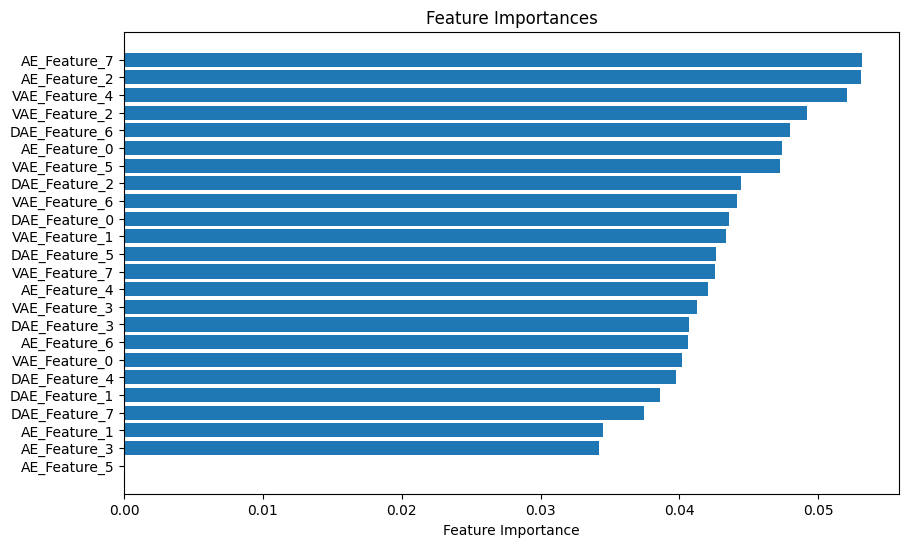

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_feature_importance(model, feature_names):
    importances = model.feature_importances_
    indices = np.argsort(importances)
    plt.figure(figsize=(10, 6))
    plt.title('Feature Importances')
    plt.barh(range(len(indices)), importances[indices], align='center')
    plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
    plt.xlabel('Feature Importance')
    plt.show()

# Combine feature names for visualization
feature_names = (['AE_Feature_{}'.format(i) for i in range(encoded_train_1.shape[1])] +
                 ['DAE_Feature_{}'.format(i) for i in range(encoded_train_2.shape[1])] +
                 ['VAE_Feature_{}'.format(i) for i in range(encoded_train_3.shape[1])])

# Train a RandomForestClassifier on combined features
clf_combined = RandomForestClassifier()
clf_combined.fit(combined_train, y_train)

# Plot feature importance
plot_feature_importance(clf_combined, feature_names)
